# Clusterization with K-Means


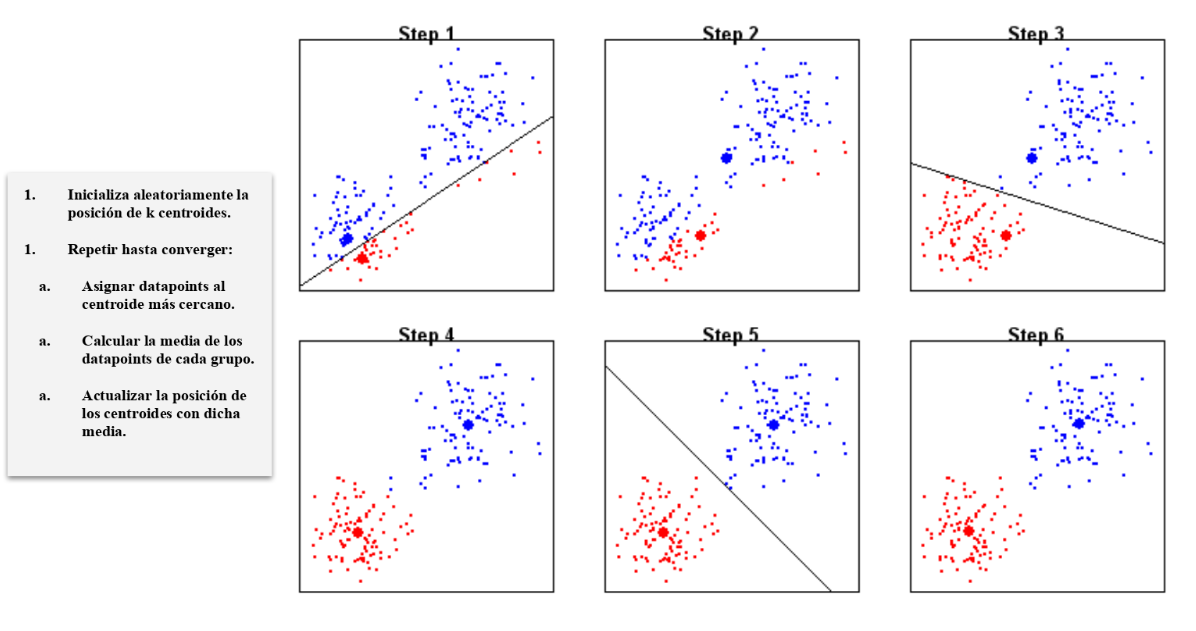

## 1. Implementing K-Means over the Iris Dataset

---

**Task:** Implement a function ***Kmeans($x_1$, $x_2$, $k$, $dist$, $max_iter$)*** that implements the K-Means clustering algorithm on the first and second variable of the Iris Setosa dataset (the one with the flowers ✿). In the cell below you are provided with an initial version of the method to be implemented, where the input variables are already standardized (important when working with distances), and where the positions of the randomly initialized centroids are displayed.

In the implemented function, as many iterations of the centroid position update will be repeated as indicated by the $max_iters$ parameter. More advanced implementations would use methods that check if the algorithm has converged to decide whether to stop iterating. This is not necessary in this case. Visualize at each iteration the position of the clusters and with colors point out to which one belongs to each *datapoint.*.

Then, implement the rest of the logic of the KMeans algorithm. 

The function should return the updated centroid vector and a vector of size equal to the number of records of your input variables (**n**), where the index of the centroid assigned to each *datapoint is indicated. 

**(Bonus 1)** Use the **Elbow Method** (and visualize its graph) to select from a different range of **K** values, the optimal number of clusters.

**(Bonus 2)** In this case you do not use the KMeans++ method for centroid initialization, which would be optimal, but random initialization. How to check that the K++ method is better than random initialization? At this point, you can use the $Y$ vector information for this.

In [1]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import pandas  as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris

# Load the date
X = load_iris().data

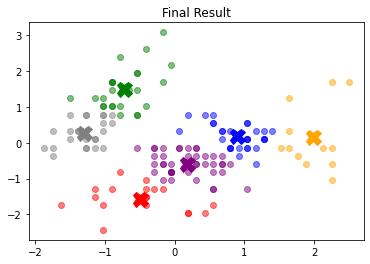

Text(0, 0.5, 'Sum of squared errors')

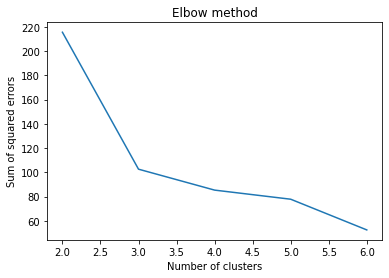

In [2]:

def Kmeans(x1, x2, k, dist, max_iters=20):
  
  # Standarize the variables
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Random initialization of the centroids.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T


  # plt.title("K-Means initialization")

  # Visualize the positions of the centroids
  colors = ["red", "blue", "green", "purple", "orange", "gray"]

  # for c in range(k):
  #   plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)

  # # Visualize the cloud of points.
  #   plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)

  plt.show()
  # To visualize each iteration
  # fig, axs = plt.subplots(0, 2, figsize = (15,15))
  for m in range(max_iters):

    xcent = np.zeros(len(x1)) # Centroid to which each point belongs 

    for i in range(len(x1)):
      
      a = [x1[i], x2[i]]
      dist1 = dist(a, centr[0,:]) # Distance to the first centroid

      for c in range(1,k):
        dist2 = dist(a, centr[c,:])    
        random = np.random.choice([True, False])  
        if dist2 < dist1: # Calculate the nearest centroid
          dist1 = dist2
          xcent[i] = c
        elif ((dist2 == dist1) * random):  # If it is equidistant then it is randomly assigned
          dist1 = dist2
          xcent[i] = c

    # To visualize each iteration
    #fig, axs = plt.subplots(1, 2)  

    #for d in range(k):
      # axs[0].plot(centr[d, 0], centr[d, 1], c=colors[d], marker="X", markersize=15)
      # axs[0].scatter(x1[xcent==d],  x2[xcent==d], c=colors[d], alpha=0.5)
      # axs[0].axis('scaled')
      # axs[0].set_title("Iteration " + str(m+1))


    for c in range(k): # Update of the centroids
      centr[c,0] = np.mean(x1[xcent==c])
      centr[c,1] = np.mean(x2[xcent==c])
      # axs[1].plot(centr[e, 0], centr[e, 1], c=colors[e], marker="X", markersize=15)
      # axs[1].scatter(x1[xcent==e],  x2[xcent==e], c=colors[e], alpha=0.5)
      # axs[1].set_title('New centroids')
      # axs[1].axis('scaled')

  # for f in range(k):
  #   plt.plot(centr[f, 0], centr[f, 1], c=colors[f], marker="X", markersize=15)
  #   plt.scatter(x1[xcent==f],  x2[xcent==f], c=colors[f], alpha=0.5)
  #   plt.title("Final result  " + str(k) + " clusters")
  # plt.show()

  return centr, xcent
# ----------------------- #  

# Function for the Euclidean distance between 2 points
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Function test:

x1 = X[:, 0:1]
x2 = X[:, 1:2]
x1 = scale(x1, with_mean=True, with_std=True)
x2 = scale(x2, with_mean=True, with_std=True)


# BONUS 1 - Elbow method
  
maxk = 6
totaldist = np.zeros(maxk-1)


for i in range(2, maxk+1):
  centr, xcent = Kmeans(x1, x2, i, dist)
  
  for j in range(i):
    for a, b in zip(x1[xcent==j], x2[xcent==j]):
      totaldist[i-2] = totaldist[i-2] + (dist(centr[j], [a, b])**2)

colors = ["red", "blue", "green", "purple", "orange", "gray"]

for c in range(6):
  plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
  plt.scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
plt.title("Final Result")
plt.show()

plt.plot(np.arange(2,maxk+1), totaldist)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')

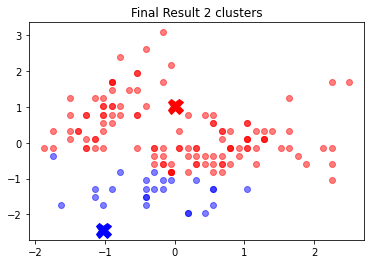

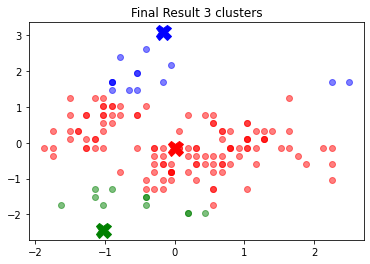

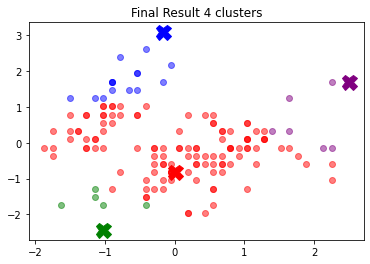

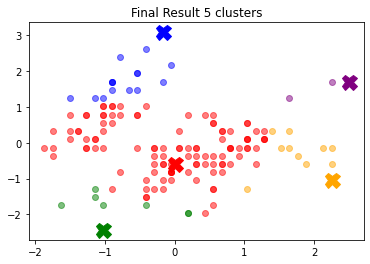

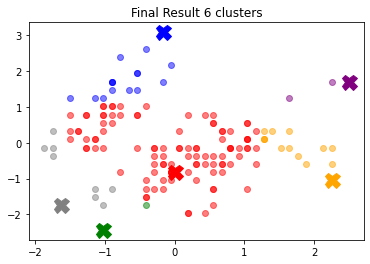

Text(0, 0.5, 'Sum of squared errors')

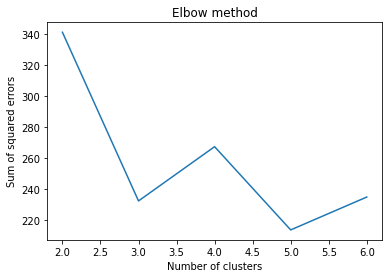

In [3]:
 #BONUS 2 - KMeans ++

def Kmeansplus(x1, x2, k, dist, max_iters=20):
  
  # Standarize the variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  centr = np.zeros(2*k).reshape(k,2)
  # Random initialization of the first centroid
  ic  = np.random.choice(x1.shape[0])
  
  centr[0,1] = x1[ic]
  centr[0,1] = x2[ic]

  # KMEANS++
  # We assign each centroid to the farthest point of the already assigned centroids.  
  for i in range(1,k):
    distmax = 0
    for j in range(len(x1)):
      a = [x1[j], x2[j]]
      distc = 0  
      for p in range(i):
        distc = distc + dist(a, centr[p,:])   # Distance to the assigned centroids

      if (distc > distmax) and (x1[j] not in centr[:,0]): # Choosing the farthest point as a centroid and checking that this point is not already a centroid
        distmax = distc
        centr[p+1,0] = x1[j]
        centr[p+1,1] = x2[j]

  plt.title("K-Means initialization")

  # Visualize the position of the centroids.
  colors = ["red", "blue", "green", "purple", "orange", "gray"]

  # for c in range(k):
  #   plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)

  # # Visualize the cloud of points
  #   plt.scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
  # plt.axis('scaled')
  # plt.show()
  # To visualize each iteration
  # fig, axs = plt.subplots(0, 2, figsize = (15,15))
  for m in range(max_iters):

    xcent = np.zeros(len(x1)) # Centroid to which each point belongs 

    for i in range(len(x1)):

      a = [x1[i], x2[i]]
      dist1 = dist(a, centr[0,:]) # Distance to the first centroid

      for c in range(1,k):
        dist2 = dist(a, centr[c,:])      
        random = np.random.choice([True, False])  
        if dist2 < dist1: # Calculate the nearest centroid
          dist1 = dist2
          xcent[i] = c
        elif ((dist2 == dist1) * random):  # If equidistant, it's randomly assigned
          dist1 = dist2
          xcent[i] = c

    # To visualize each iteration
    # fig, axs = plt.subplots(1, 2)  

    # for c in range(k):
    #   axs[0].plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
    #   axs[0].scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
    #   axs[0].axis('scaled')
    #   axs[0].set_title("Iteration " + str(m+1))


    # for c in range(k): # Update of the centroids
    #   centr[c,0] = np.mean(x1[xcent==c])
    #   centr[c,1] = np.mean(x2[xcent==c])
    #   axs[1].plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
    #   axs[1].scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
    #   axs[1].set_title('New centroids')
    #   axs[1].axis('scaled')

  for c in range(k):
    plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
    plt.scatter(x1[xcent==c],  x2[xcent==c], c=colors[c], alpha=0.5)
    plt.title("Final Result " + str(k) + " clusters")
  plt.show()

  return centr, xcent

# Elbow method

x1 = X[:, 0:1]
x2 = X[:, 1:2]
x1 = scale(x1, with_mean=True, with_std=True)
x2 = scale(x2, with_mean=True, with_std=True)

colors = ["red", "blue", "green", "purple", "orange", "gray"]
maxk = 6
totaldist = np.zeros(maxk-1)


for i in range(2, maxk+1):
  centr, xcent = Kmeansplus(x1, x2, i, dist)
  
  for c in range(i):
    for j, k in zip(x1[xcent==c], x2[xcent==c]):
      totaldist[i-2] = totaldist[i-2] + (dist(centr[c], [j, k])**2)


plt.plot(np.arange(2,maxk+1), totaldist)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
